In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

## Analisando dataset

In [3]:
train_df = pd.read_csv('https://raw.githubusercontent.com/jfmvs/AM-Projeto-1/main/avila-tr.txt',header=None)
test_df = pd.read_csv('https://raw.githubusercontent.com/jfmvs/AM-Projeto-1/main/avila-ts.txt',header=None)

In [4]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


In [5]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,0.033611,-0.000525,-0.002387,0.006370,0.013973,0.005605,0.010323,0.012914,0.000818
std,0.991431,3.920868,1.120202,1.008527,0.992053,1.126245,1.313754,1.003507,1.087665,1.007094
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541991,-0.372457,-0.516097
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111803,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654944,0.500624,0.530855
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,4.671232


In [6]:
train_df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

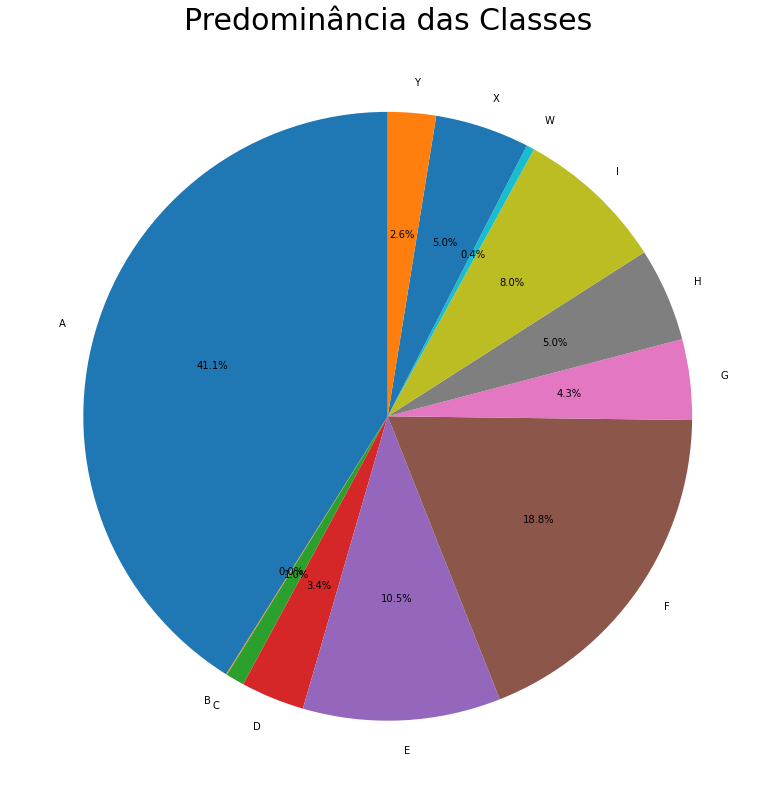

In [7]:
# grafico pizza
import matplotlib.pyplot as plt

labels = ['A', 'B', 'C', 'D','E','F','G','H','I','W','X','Y']
sizes = [4286, 5, 103, 352, 1095, 1961, 446, 519, 831, 44, 522, 266]
y = train_df[10]
# Plot
fig, ax = plt.subplots(figsize=(14, 14))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Title
ax.set_title('Predominância das Classes', fontsize=30)

plt.setp(ax.get_xticklabels(labels))
# Show plot
plt.show()

In [8]:
pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 25.9 MB/s eta 0:00:00


In [9]:
import sweetviz
my_report = sweetviz.analyze(train_df)

                                             |          | [  0%]   00:00 -> (? left)

In [10]:
my_report.show_html('report.html',open_browser=False)

Report report.html was generated.



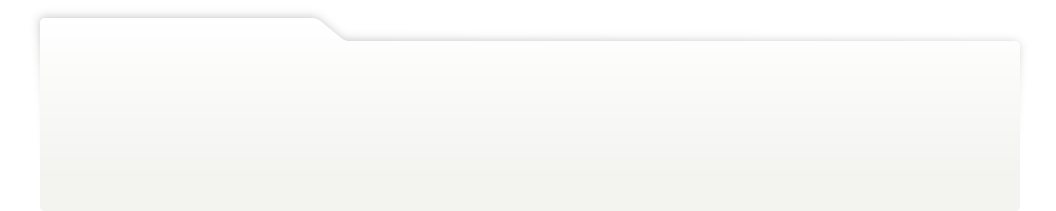
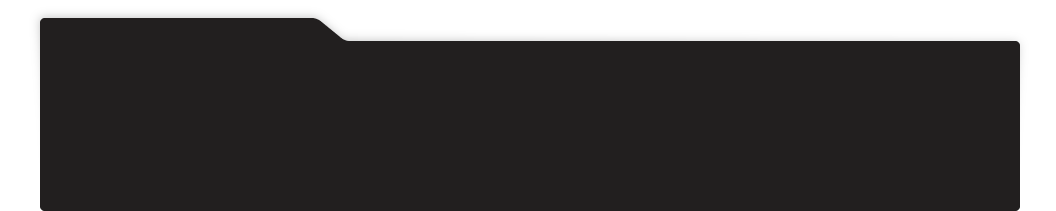
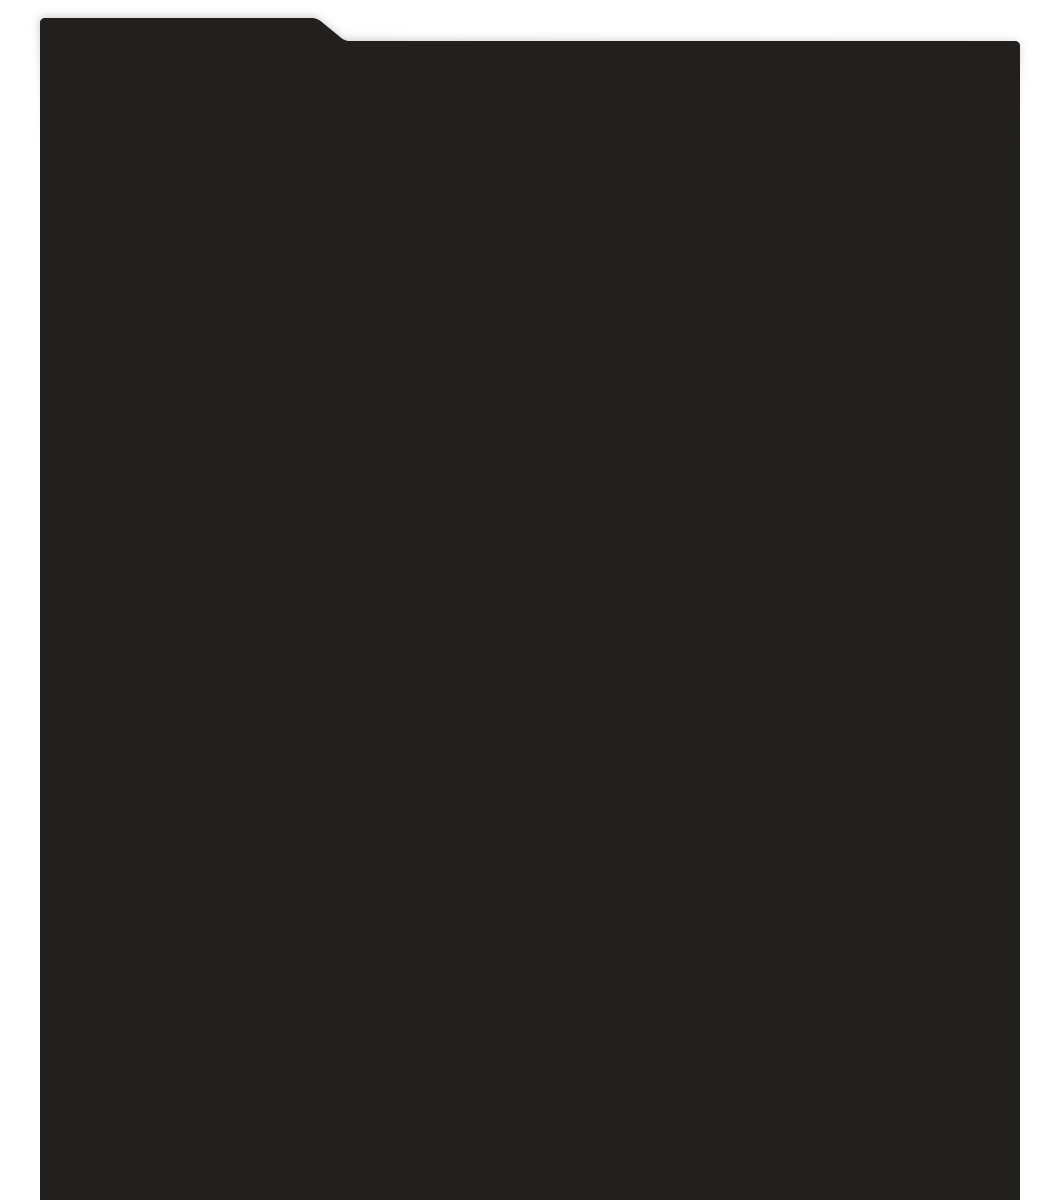
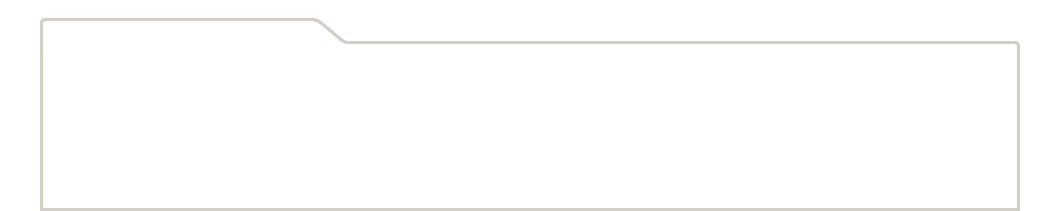
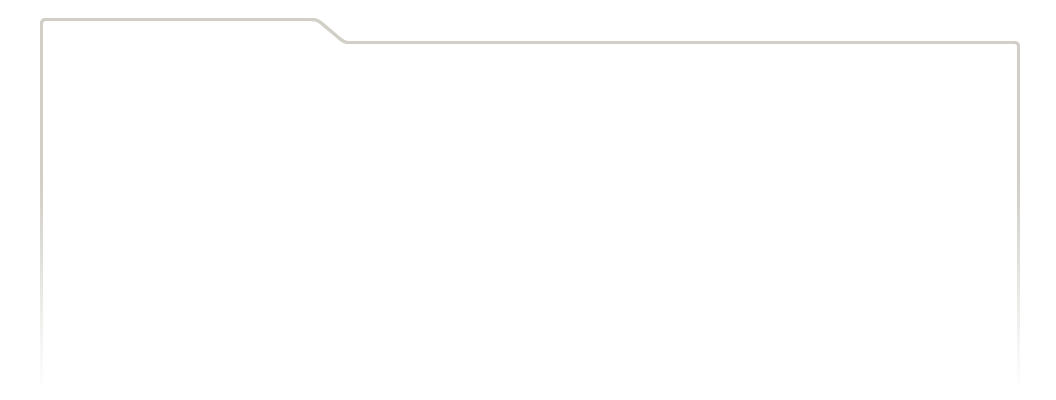
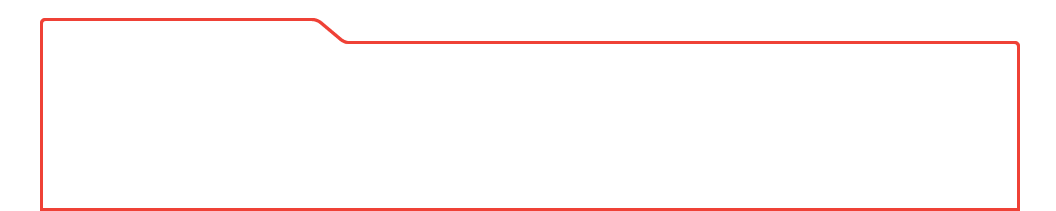
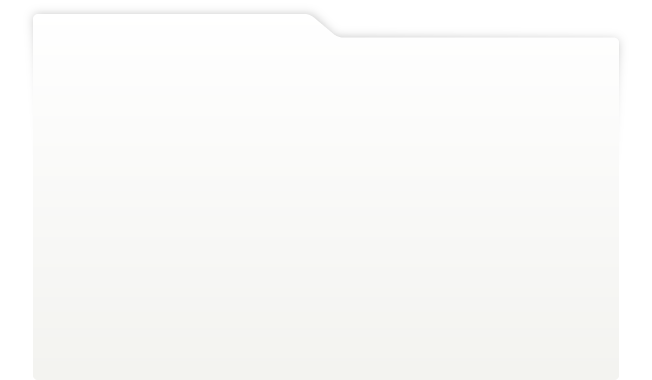
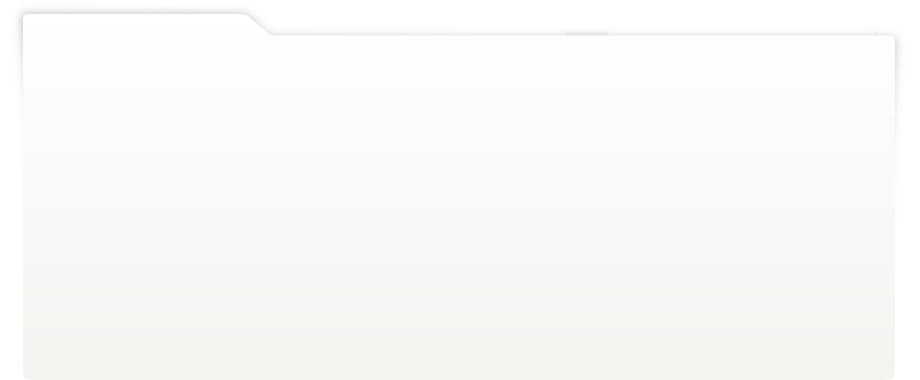
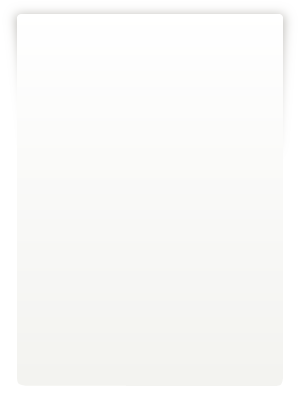
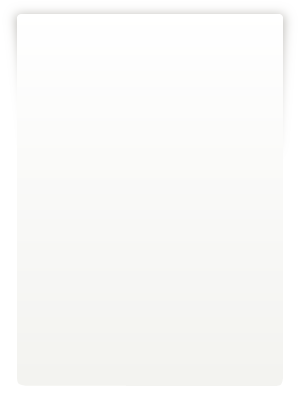
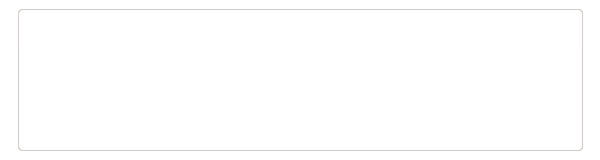
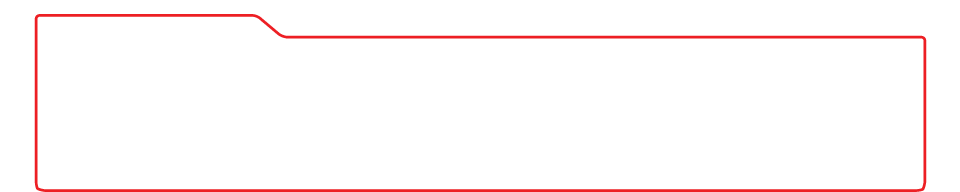
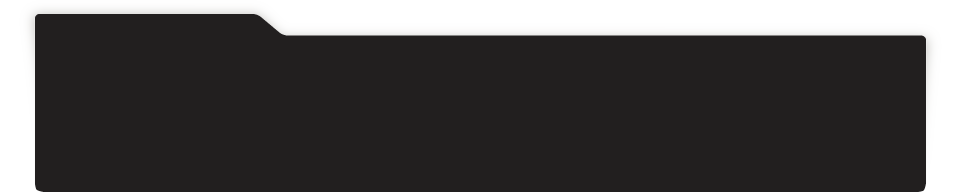
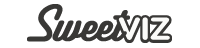
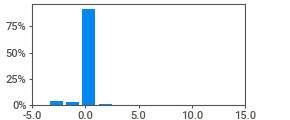
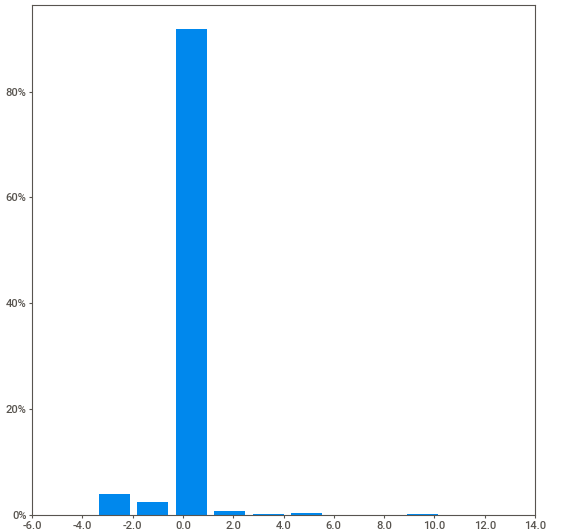
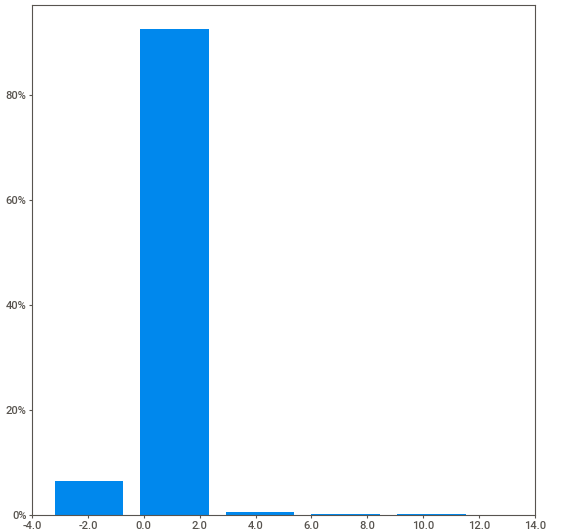
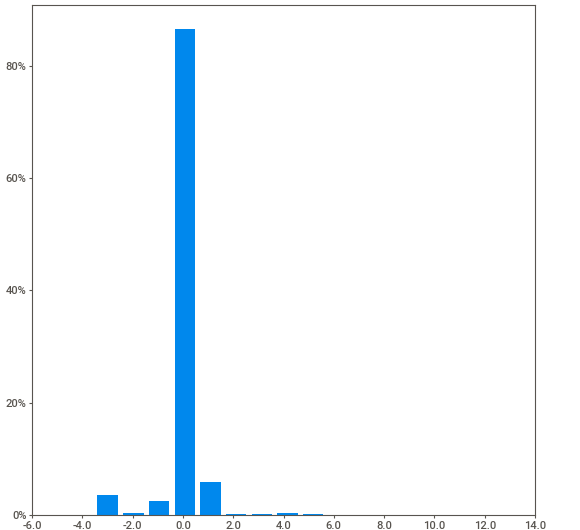
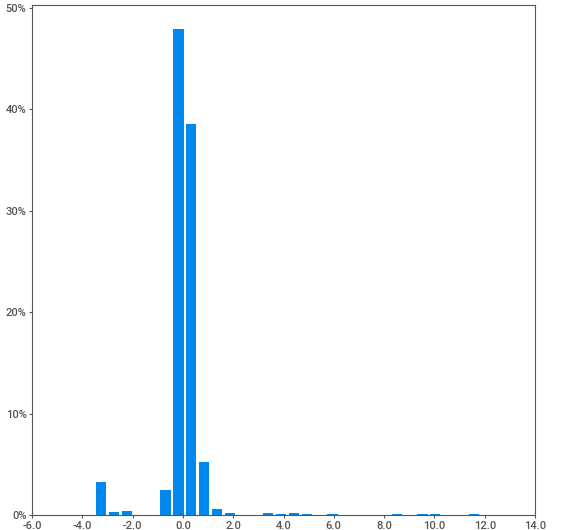
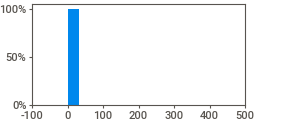
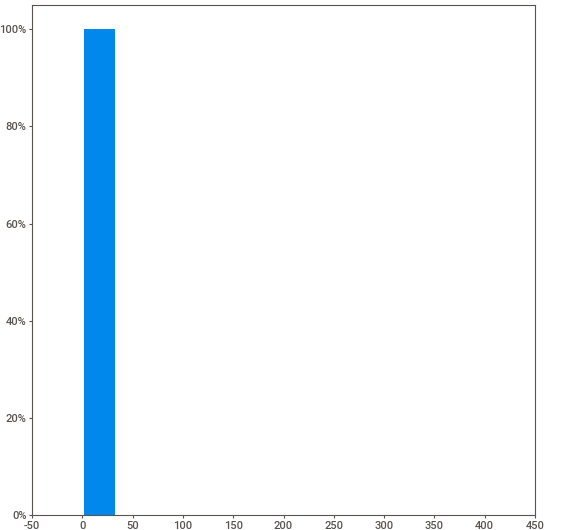
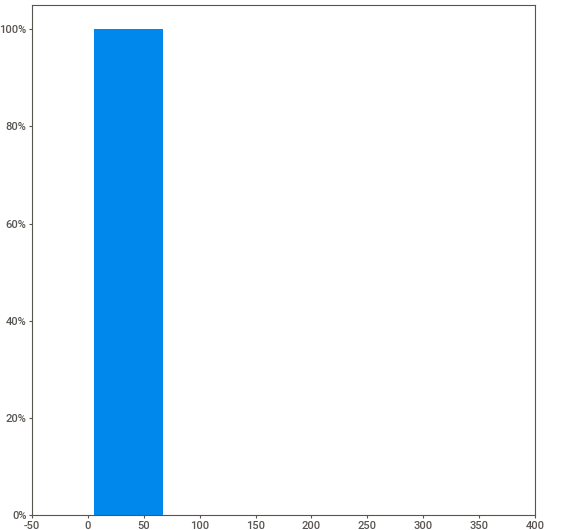
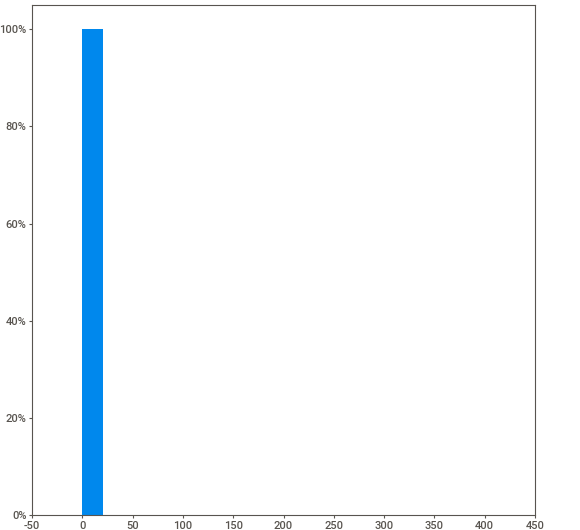
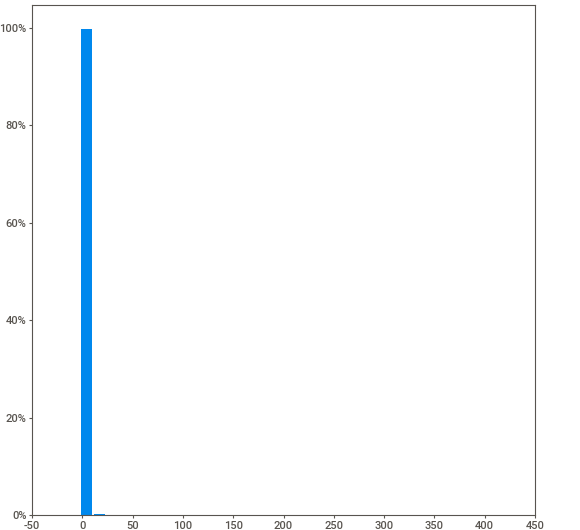
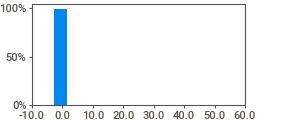
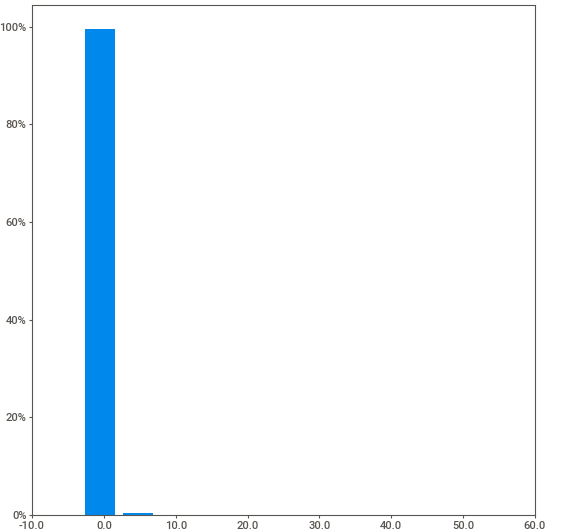
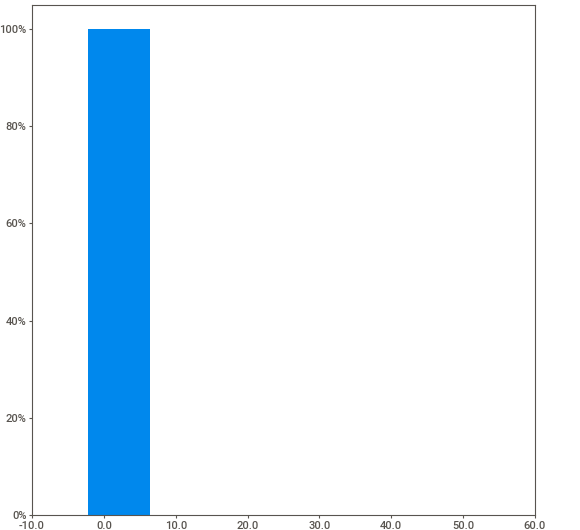
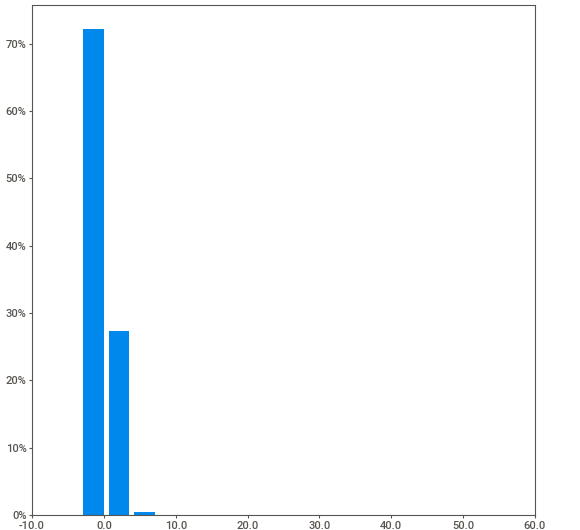
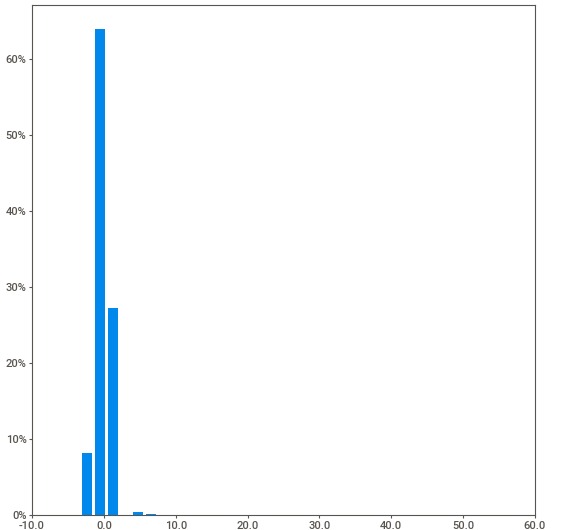
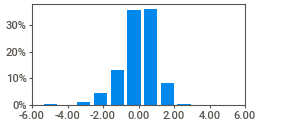
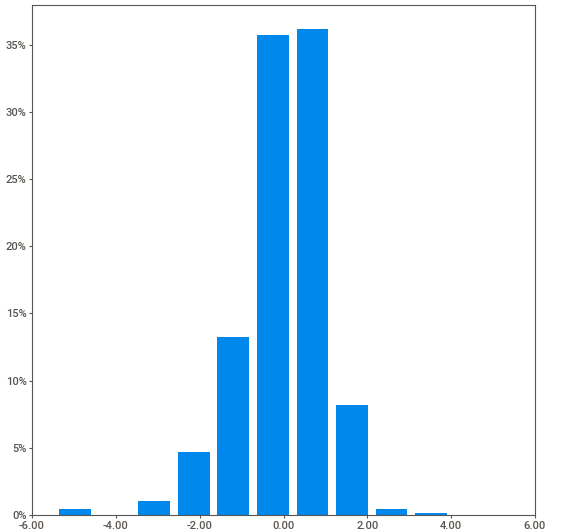
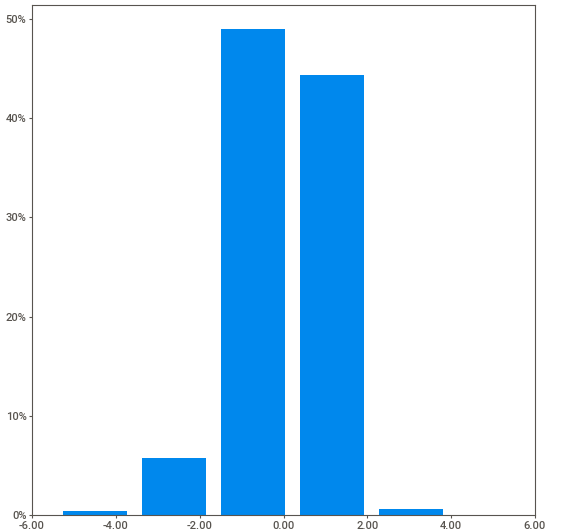
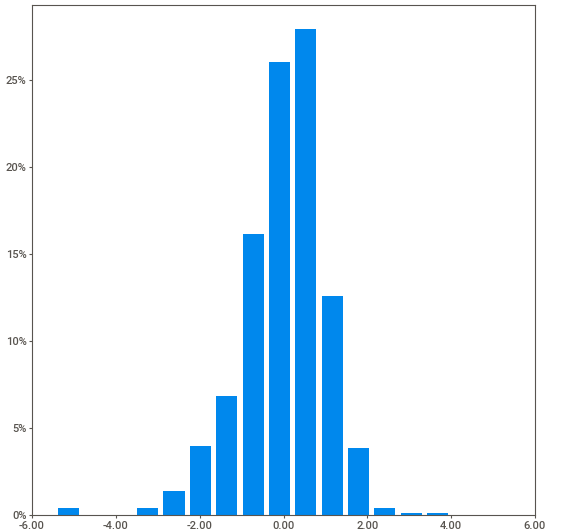
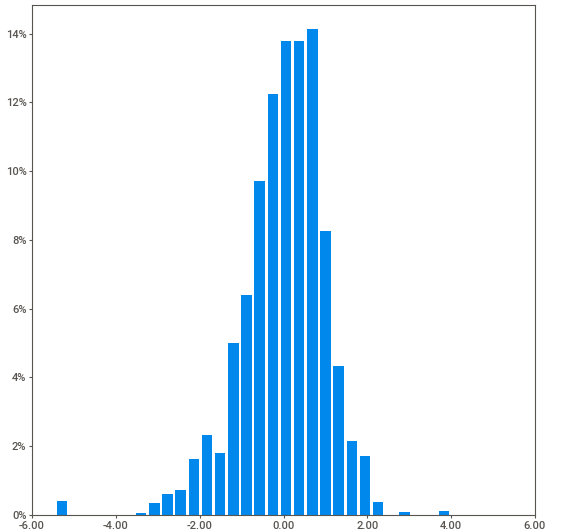
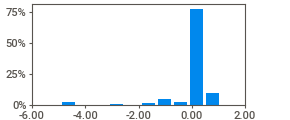
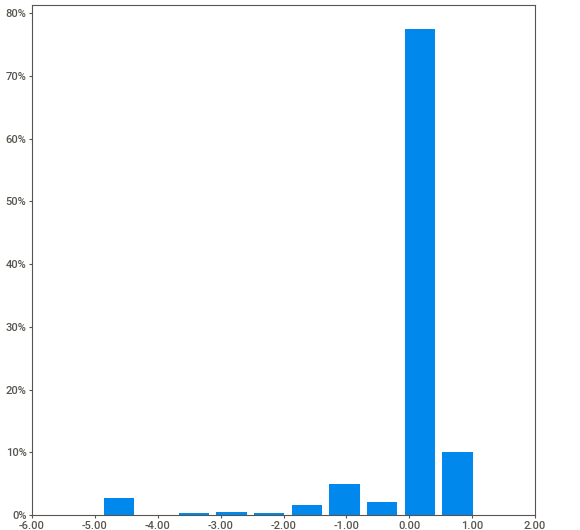
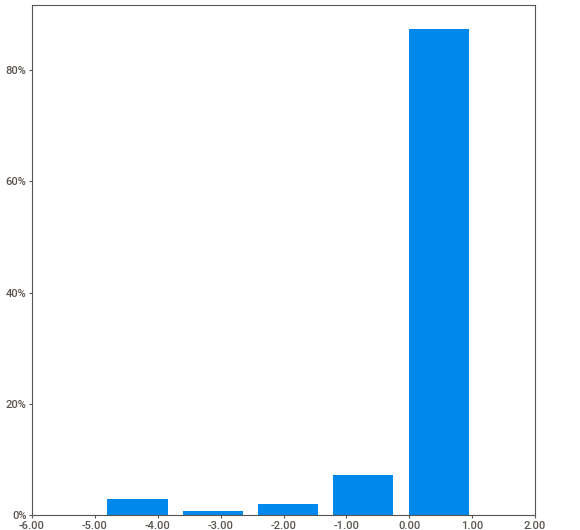
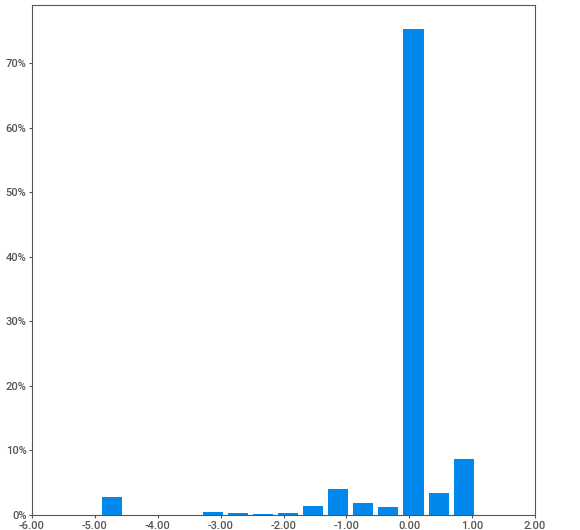
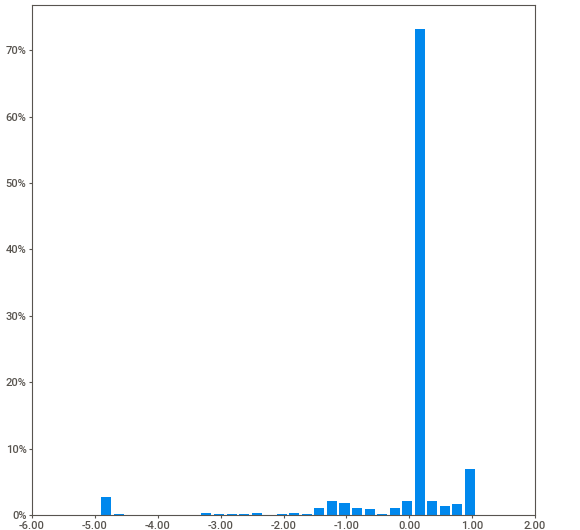
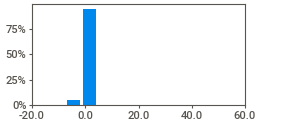
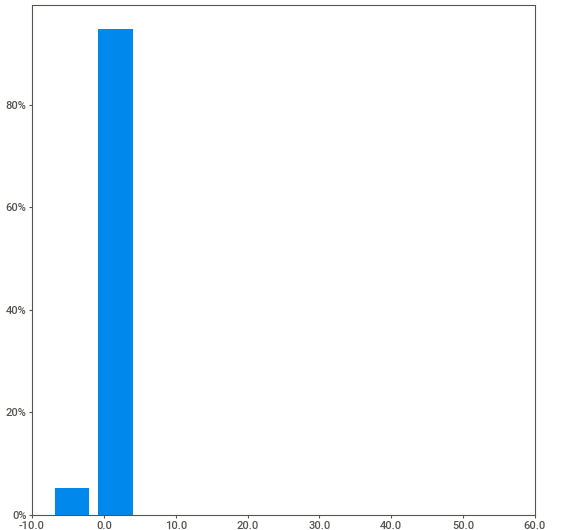
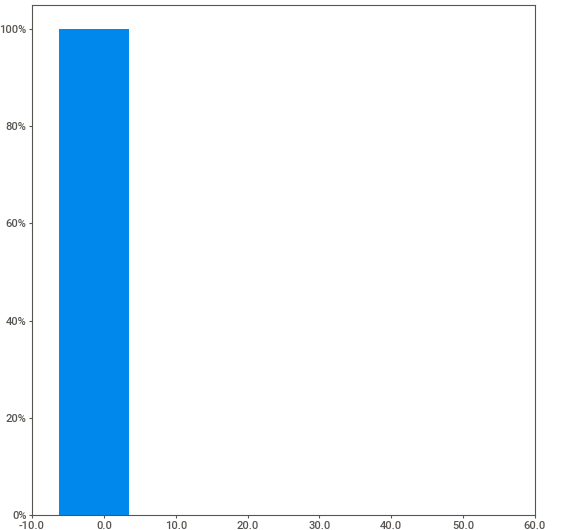
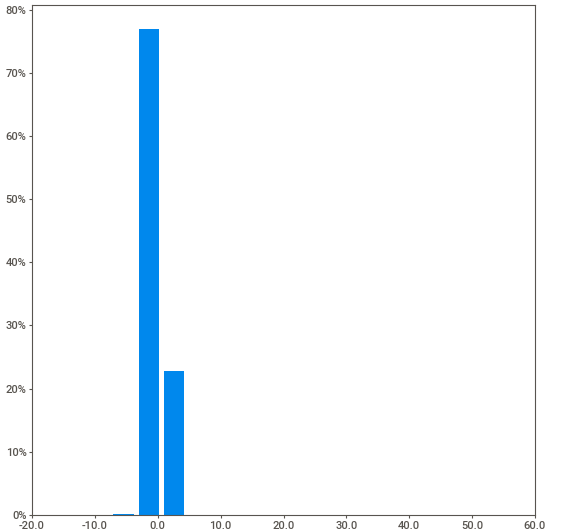
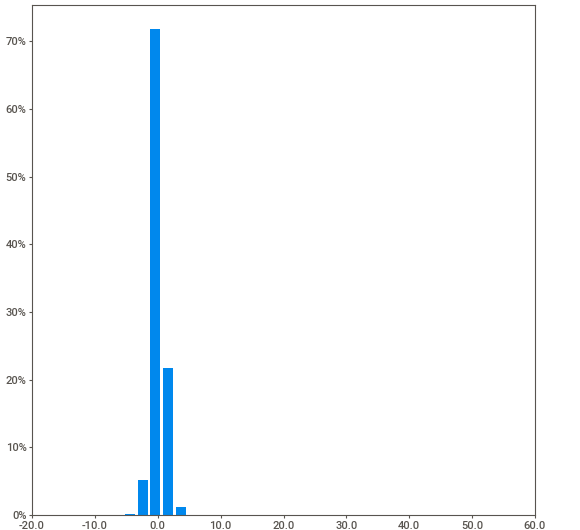
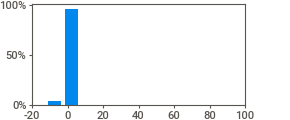
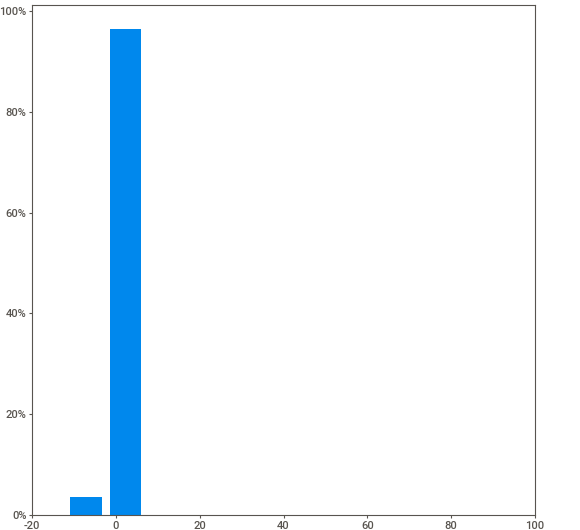
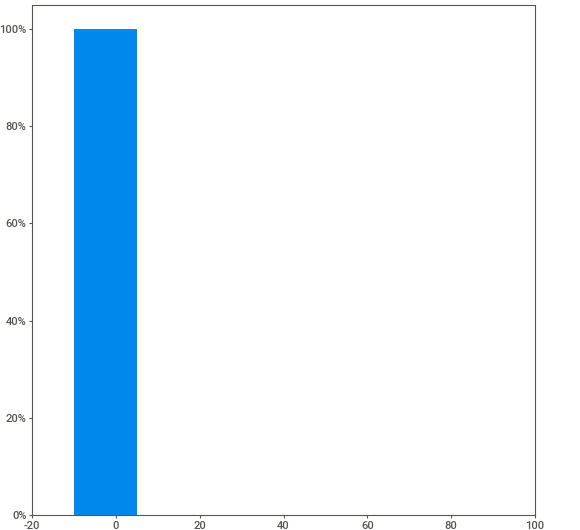
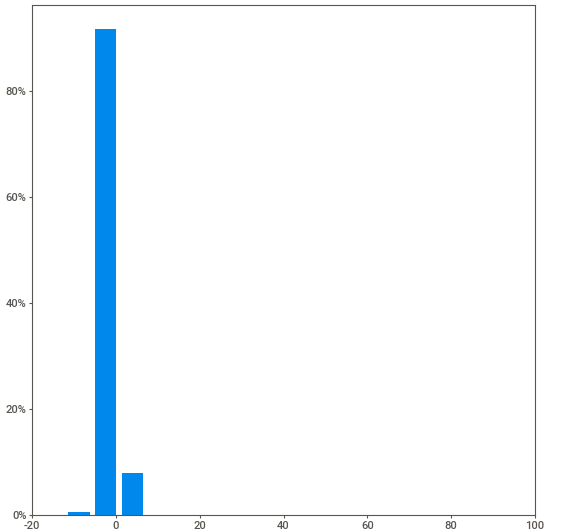
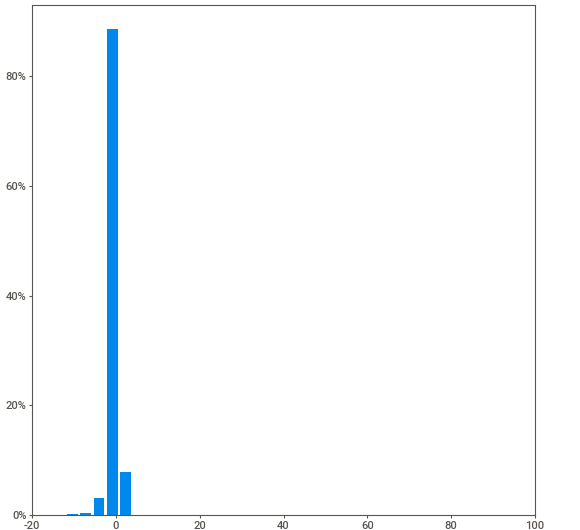
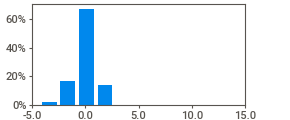
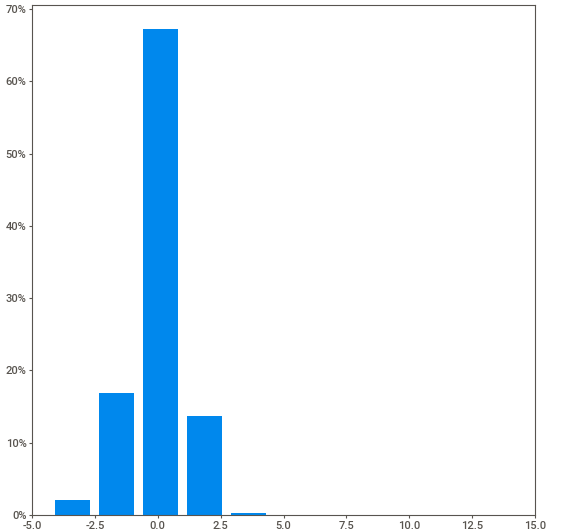
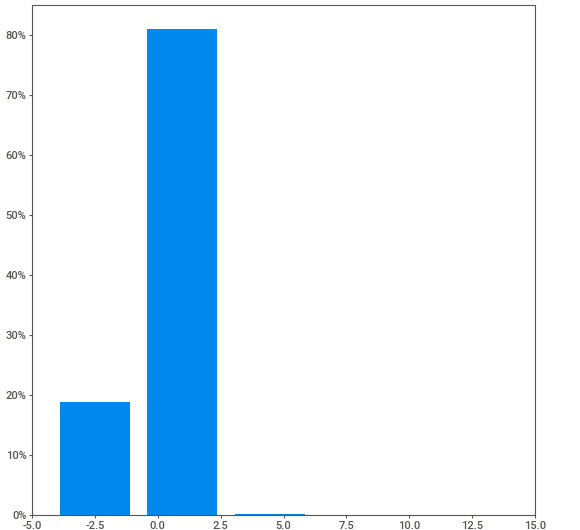
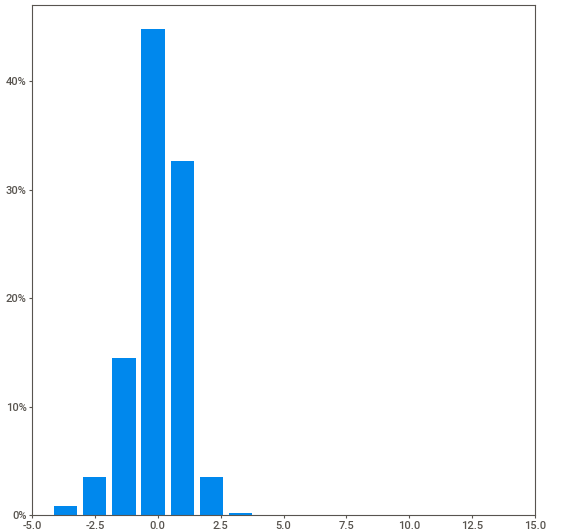
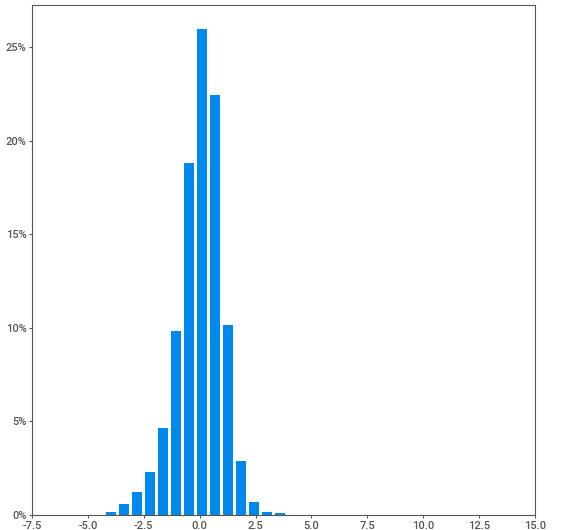
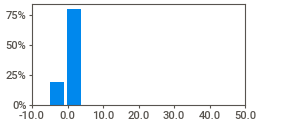
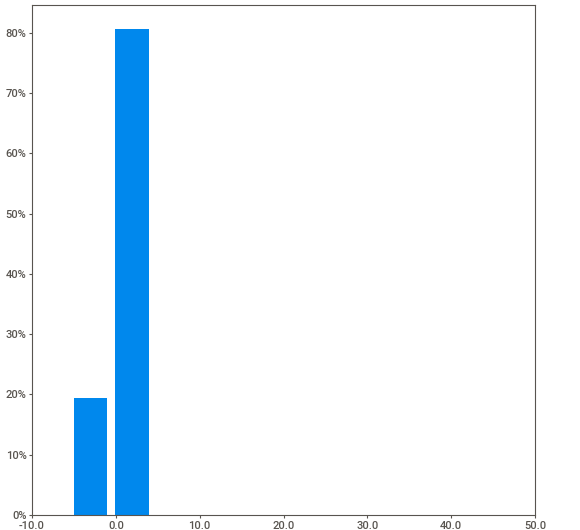
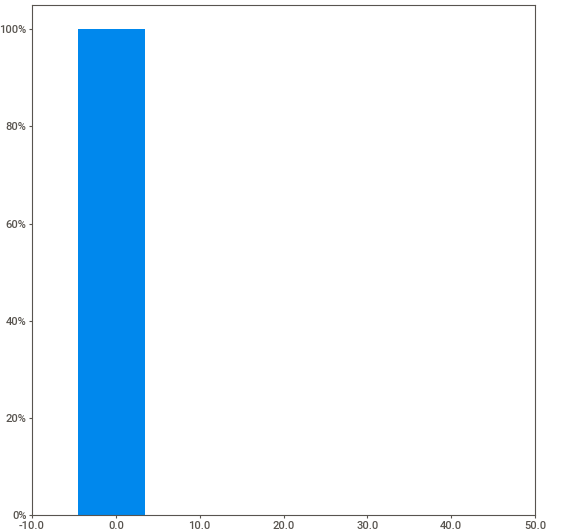
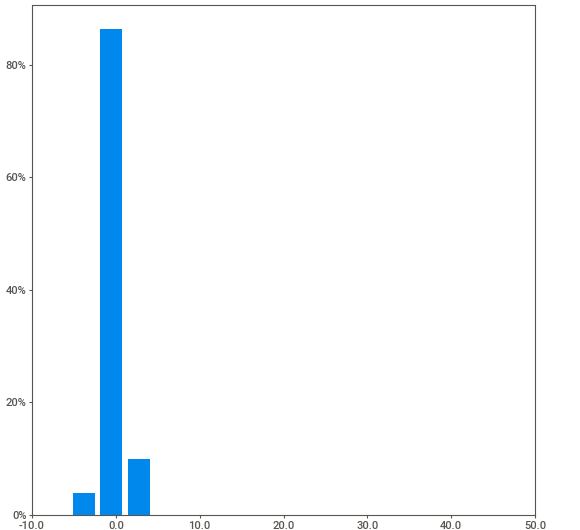
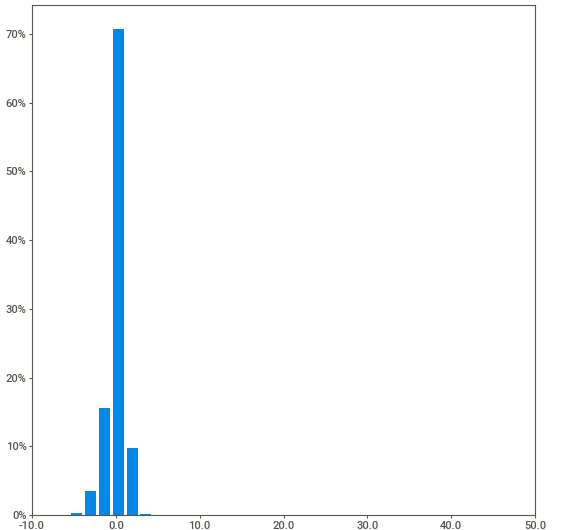
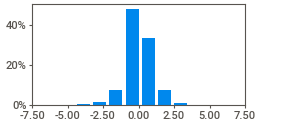
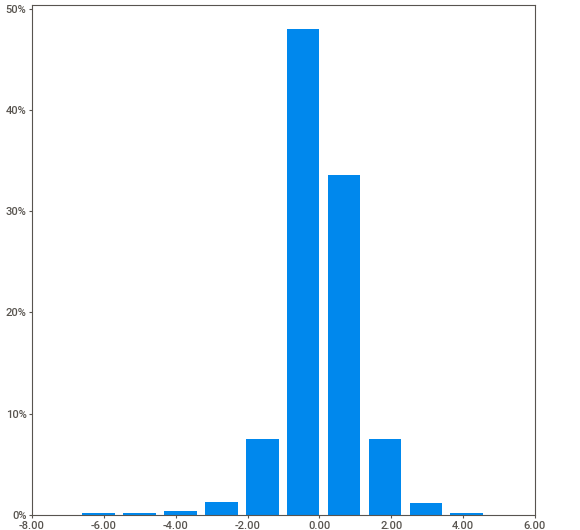
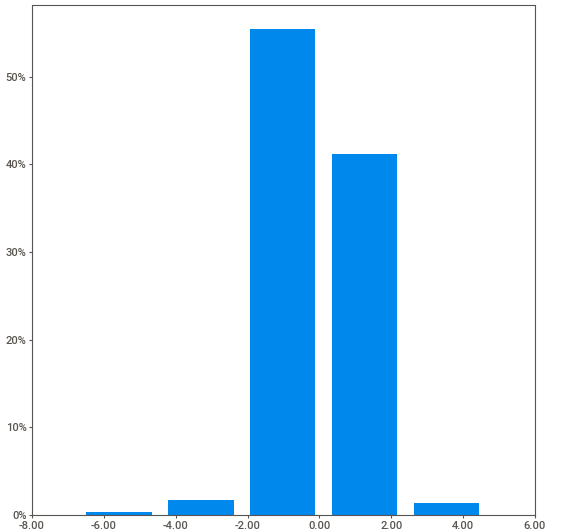
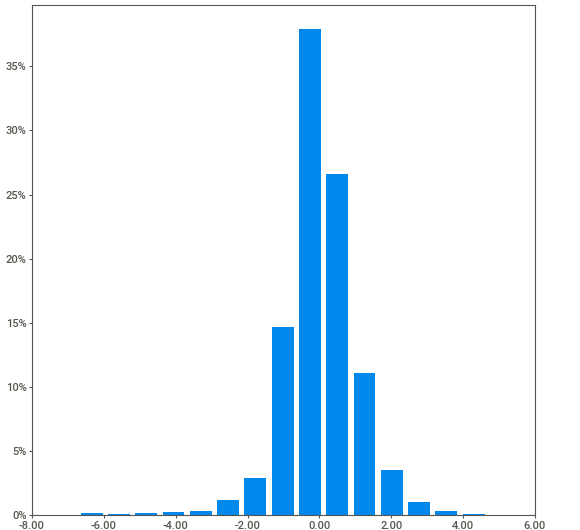
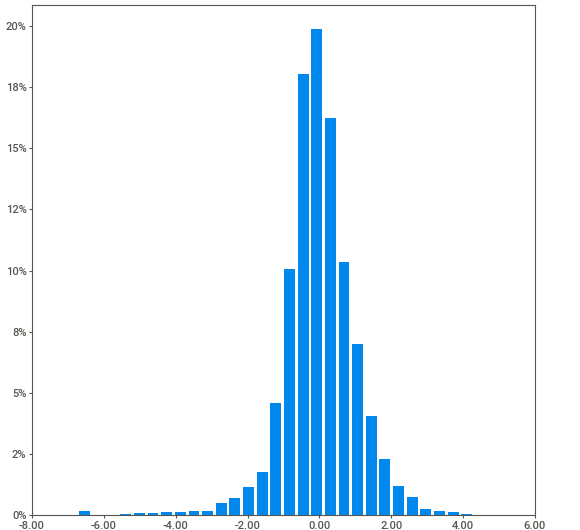
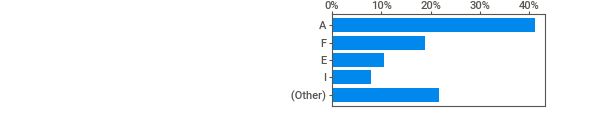
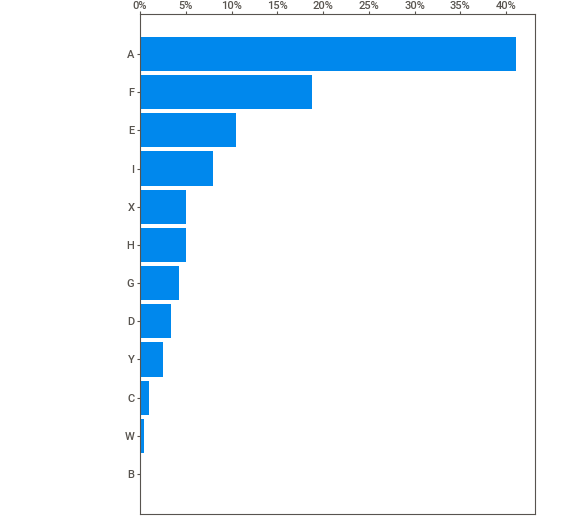
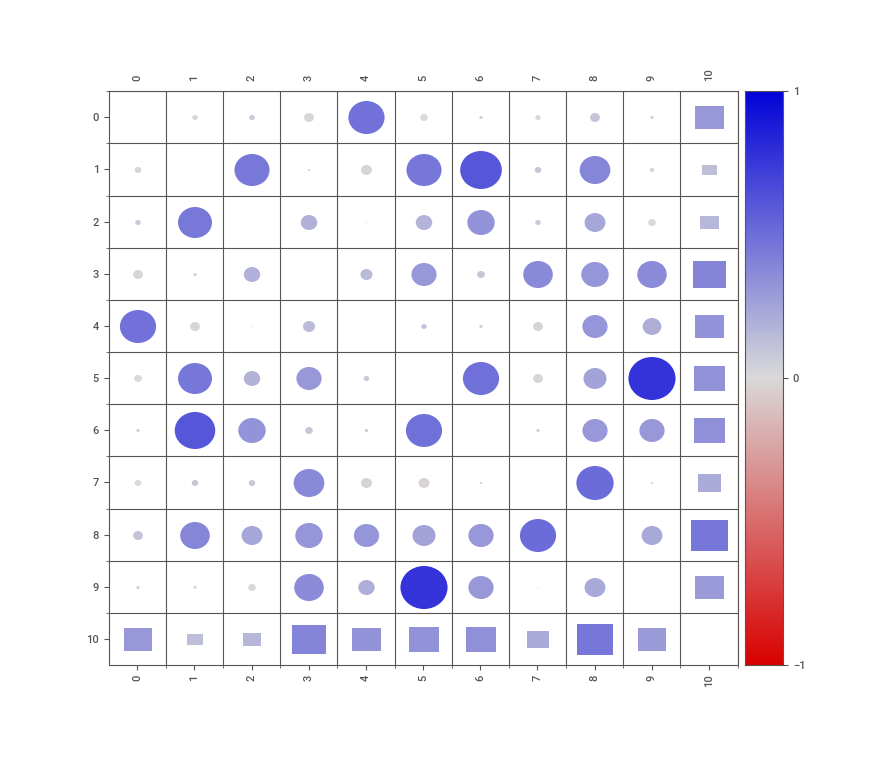
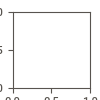

In [11]:
import IPython
IPython.display.HTML('report.html')

## Dividindo dados para uso

In [12]:
y = train_df[10]
X = train_df.drop(10,axis=1)

y_test = test_df[10]
X_test = test_df.drop(10,axis=1)

In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.30,random_state=80)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
Xn = pd.DataFrame(scaler.transform(X),columns = X.columns)
X_trainn = pd.DataFrame(scaler.transform(X_train),columns = X_train.columns)
X_validn = pd.DataFrame(scaler.transform(X_valid),columns = X_valid.columns)
X_testn = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

## Criando baseline

In [15]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
bl_pred = clf.predict(X_valid)
print(confusion_matrix(y_valid,bl_pred))
print(classification_report(y_valid,bl_pred))
metrics_bl = [precision_score(y_valid,bl_pred,average='weighted'),recall_score(y_valid,bl_pred,average='weighted'), f1_score(y_valid,bl_pred,average='weighted')]
print(metrics_bl)

[[1282    0    0    3    6    4    4    8    1    1    0    3]
 [   0    1    0    0    0    0    0    0    0    0    0    0]
 [   0    0   22    1    0    0    0    0    0    0    0    0]
 [   1    0    0  111    2    0    0    0    0    0    0    0]
 [   4    0    0    8  299    1    2    1    0    0    6    1]
 [  26    0    0    5    0  571    1    0    0    0    0    0]
 [   0    0    0    0    0    1  134    3    0    0    0    0]
 [   2    0    2    0    2    3    2  118    0    0    0    0]
 [   0    0    0    0    0    0    0    0  234    0    0    0]
 [   0    0    0    0    0    0    0    0    0   14    0    0]
 [   2    0    0    0    7    0    0    0    0    1  158    4]
 [   0    0    0    0    1    0    1    0    0    0    3   62]]
              precision    recall  f1-score   support

           A       0.97      0.98      0.98      1312
           B       1.00      1.00      1.00         1
           C       0.92      0.96      0.94        23
           D       0.87   

## Modelagem e tunelamento de parâmetros

### Decision Tree

In [16]:
# usando grid search e fazendo o cross validation com 5 folds, pode usar o X completo mesmo
param_grid_dt = {'random_state' : [None,1],
              'criterion' : ['entropy', 'gini'],
              'max_features':[.1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0, 2,10,'sqrt', None],
              'max_depth': [3, 5, 7, 9, 12, None],
              'min_samples_split':[2,4,8]}

clf_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, scoring='f1_weighted', cv=5)
clf_dt.fit(X, y)
print(clf_dt.best_params_)      
print(clf_dt.best_score_)      

{'criterion': 'entropy', 'max_depth': None, 'max_features': 1.0, 'min_samples_split': 2, 'random_state': None}
0.9830013369676533


In [17]:
  
print(clf_dt.best_score_)      

0.9830013369676533


### Naive Bayes

In [18]:
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}

clf_nb = GridSearchCV(GaussianNB(), param_grid_nb, scoring='f1_weighted', cv=5)
clf_nb.fit(Xn, y)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='f1_weighted')

### Logistic Regression

In [19]:
param_grid_lr = {
    'max_iter' : [500,1000,10000],'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

clf_lr = GridSearchCV(LogisticRegression(), param_grid_lr, scoring='f1_weighted',cv=5)
clf_lr.fit(Xn, y)
print(clf_lr.best_params_)
print(f'Melhor validacao: {clf_lr.best_score_}')

{'max_iter': 1000, 'solver': 'sag'}
Melhor validacao: 0.40538420540814835


### K Nearest-Neighbors

In [20]:
param_grid_knn = { 
    'n_neighbors' : list(range(1,50)),'metric':['euclidean']}

clf_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn,cv=5, scoring='f1_weighted')
clf_knn.fit(Xn, y)
print(clf_knn.best_params_)
print(f'Melhor validacao: {clf_knn.best_score_}')

{'metric': 'euclidean', 'n_neighbors': 1}
Melhor validacao: 0.7330341109922164


In [21]:
param_grid_knn = { 
    'n_neighbors' : list(range(1,50)),'metric':['euclidean']}

clf_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn,cv=5, scoring='f1_weighted')
clf_knn.fit(X, y)
print(clf_knn.best_params_)
print(f'Melhor validacao: {clf_knn.best_score_}')

{'metric': 'euclidean', 'n_neighbors': 1}
Melhor validacao: 0.7438317762215071


## Usando Teste

In [22]:
metrics_bl = [precision_score(y_test,clf.predict(X_test),average='weighted'),recall_score(y_test,clf.predict(X_test),average='weighted'), f1_score(y_test,clf.predict(X_test),average='weighted')]
metrics_dt = [precision_score(y_test,clf_dt.predict(X_test),average='weighted'),recall_score(y_test,clf_dt.predict(X_test),average='weighted'), f1_score(y_test,clf_dt.predict(X_test),average='weighted')]
metrics_nb = [precision_score(y_test,clf_nb.predict(X_testn),average='weighted'),recall_score(y_test,clf_nb.predict(X_testn),average='weighted'), f1_score(y_test,clf_nb.predict(X_testn),average='weighted')]
metrics_lr = [precision_score(y_test,clf_lr.predict(X_testn),average='weighted'),recall_score(y_test,clf_lr.predict(X_testn),average='weighted'), f1_score(y_test,clf_lr.predict(X_testn),average='weighted')]
metrics_knn = [precision_score(y_test,clf_knn.predict(X_testn),average='weighted'),recall_score(y_test,clf_knn.predict(X_testn),average='weighted'), f1_score(y_test,clf_knn.predict(X_testn),average='weighted')]

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
print(metrics_bl)

[0.957886062209684, 0.9574590399540098, 0.9575350936230609]


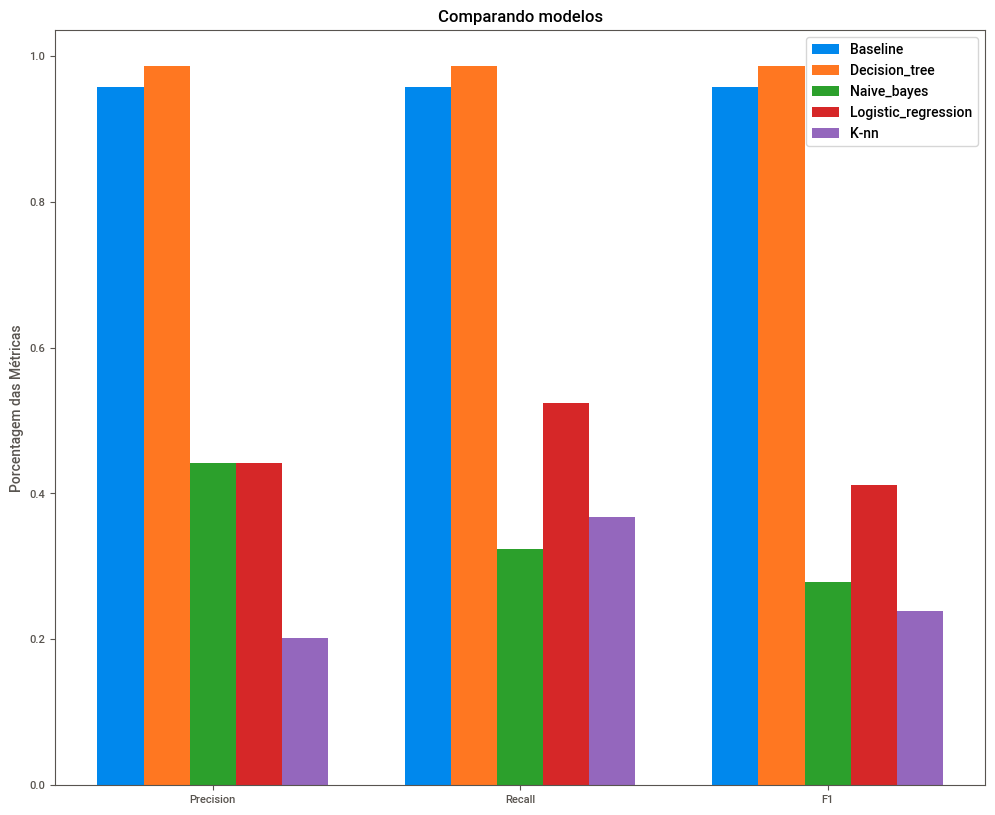

In [31]:
import matplotlib.pyplot as plt

# Criar a figura e os eixos do gráfico
fig, ax = plt.subplots(figsize=(12,10))

# Definir as larguras das barras
largura_barra = 0.15

# Definir a posição de cada conjunto de barras
pos1 = pos1 = np.arange(3)
pos2 = [p + largura_barra for p in pos1]
pos3 = [p + largura_barra for p in pos2]
pos4 = [p + largura_barra for p in pos3]
pos5 = [p + largura_barra for p in pos4]

# Plotar as barras
ax.bar(pos1, metrics_bl, largura_barra, label='Baseline')
ax.bar(pos2, metrics_dt, largura_barra, label='Decision_tree')
ax.bar(pos3, metrics_nb, largura_barra, label='Naive_bayes')
ax.bar(pos4, metrics_lr, largura_barra, label='Logistic_regression')
ax.bar(pos5, metrics_knn, largura_barra, label='K-nn')

# Definir o título e os rótulos dos eixos
ax.set_title('Comparando modelos')
ax.set_ylabel('Porcentagem das Métricas')

# Definir as legendas
ax.legend()

ax.set_xticks([pos + largura_barra*2 for pos in pos1])
ax.set_xticklabels(['Precision', 'Recall', 'F1'])

# Exibir o gráfico
plt.show()

<AxesSubplot:>

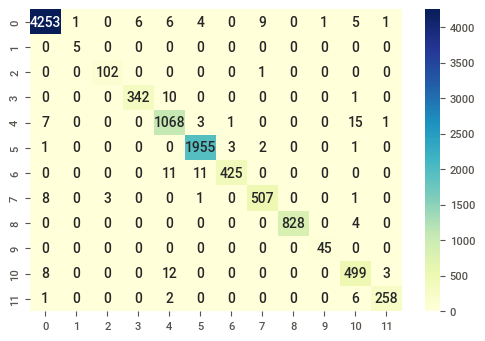

In [25]:
import seaborn as sns
cm = confusion_matrix(y_test,clf_dt.predict(X_test))


cm_matrix = pd.DataFrame(data=cm)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

<AxesSubplot:>

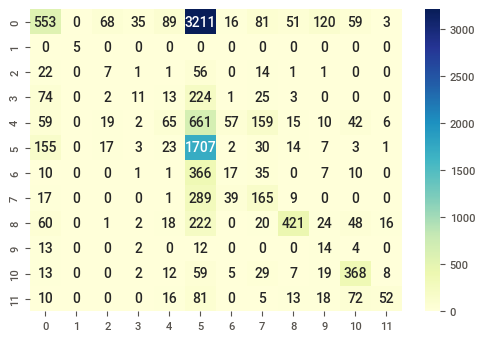

In [26]:
import seaborn as sns
cm = confusion_matrix(y_test,clf_nb.predict(X_testn))


cm_matrix = pd.DataFrame(data=cm)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

<AxesSubplot:>

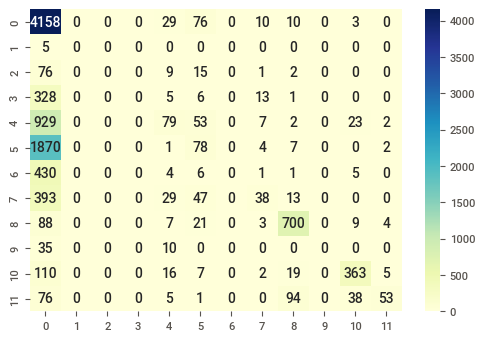

In [27]:
import seaborn as sns
cm = confusion_matrix(y_test,clf_lr.predict(X_testn))


cm_matrix = pd.DataFrame(data=cm)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

<AxesSubplot:>

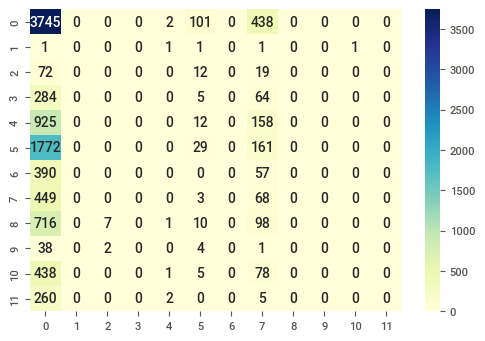

In [28]:
import seaborn as sns
cm = confusion_matrix(y_test,clf_knn.predict(X_testn))


cm_matrix = pd.DataFrame(data=cm)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [29]:
df = pd.DataFrame({
    'Baseline': metrics_bl,
    'Decision Tree': metrics_dt,
    'Naive Bayes': metrics_nb,
    'Logistic Regression': metrics_lr,
    'k-NN': metrics_knn
}, index = ['Precision','Recall','F1'])

In [30]:
df.T.head()

,Precision,Recall,F1
Baseline,0.957886,0.957459,0.957535
Decision Tree,0.985733,0.985628,0.985644
Naive Bayes,0.441706,0.324327,0.279252
Logistic Regression,0.442355,0.524001,0.411459
k-NN,0.202091,0.368113,0.239097
